___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***) and **Deep Learning algorithms**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [230]:
# !pip install pyforest
# 1-Import Libraies
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno 

from sklearn.compose import make_column_transformer

# Scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


# Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# !pip install termcolor
import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored

import ipywidgets
from ipywidgets import interact

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud 

### Some Useful User Defined Functions

In [128]:
## Some Useful Functions

###############################################################################

def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n', 
          colored('-'*79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    
        
def multicolinearity_control(df):
    feature =[]
    collinear=[]
    for col in df.corr().columns:
        for i in df.corr().index:
            if (abs(df.corr()[col][i])> .9 and abs(df.corr()[col][i]) < 1):
                    feature.append(col)
                    collinear.append(i)
                    print(colored(f"Multicolinearity alert in between:{col} - {i}", 
                                  "red", attrs=['bold']), df.shape,'\n',
                                  colored('-'*79, 'red', attrs=['bold']), sep='')

def duplicate_values(df):
    print(colored("Duplicate check...", attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("Duplicates were dropped!"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')     
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary will drop related columns!', attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)       
    print('New shape after missing value control:', df.shape)
        
###############################################################################

# To view summary information about the column

def first_look(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

In [129]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [130]:
df.tail()

Unnamed: 0  Clothing ID  Age  \
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                    Title  \
23481                      Great dress for many occasions   
23482                          Wish it was made of cotton   
23483                               Cute, but see through   
23484  Very cute dress, perfect for summer parties and we   
23485                     Please make more like this one!   

                                                                                                                                                                                                   Review Text  \
23481                                                                      I was very happy to snag this dress at such a great price! it's very easy to slip on and has a very flattering cut and color combo.   
23482  It reminds me of maternity clothes. soft, stretchy, shiny material. cut is flattering and drapes nicely. i only found one button to close front... looked awkward. nice long sleeves.\nnot for me bu...   
23483  This fit well, but the top was very see through. this never would have worked for me. i'm glad i was able to try it on in the store and didn't order it online. with different fabric, it would have...   
23484  I bought this dress for a wedding i have this summer, and it's so cute. unfortunately the fit isn't perfect. the medium fits my waist perfectly, but was way too long and too big in the bust and sh...   
23485                                                                                           This dress in a lovely platinum is feminine and fits perfectly, easy to wear and comfy, too! highly recommend!   

       Rating  Recommended IND  Positive Feedback Count   Division Name  \
23481       5                1                        0  General Petite   
23482       3                1                        0  General Petite   
23483       3                0                        1  General Petite   
23484       3                1                        2         General   
23485       5                1                       22  General Petite   

      Department Name Class Name  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses

In [131]:
df.sample(5)

Unnamed: 0  Clothing ID  Age                                    Title  \
10972       10972          934   56                       Gorgeous and comfy   
18673       18673          840   48                           Wide wide wide   
13486       13486          927   29                                      NaN   
8833         8833          993   35  Beautiful but not for girls with curves   
10402       10402          941   45                           Thick and cozy   

                                                                                                                                                                                                   Review Text  \
10972                                                                                          This sweater runs oversized; very soft and comfortable and colors are spot on for fall. love the sleeve length.   
18673           Too wide! the design is cute but the wideness of the overall piece and arms made me lose my shape. you can't see your figure underneath at all. i don't like pieces like that. this went back.   
13486  It's a beautiful sweater but it is very wide (much wider than it looks on the model), even in the xs/s. it is also fairly itchy. just way too big for my small frame, which is not really the look i...   
8833   I ordered this skirt and i was so excited when i first saw it. the photo doesn't really do the colors justice. the contrast of the bright colors makes this skirt one of a kind. i returned this ite...   
10402                                    I love this sweater, especially the sleeves. i'm 5'2 and athletic so i don't' feel that it is the most flattering for my figure but i love it so much that i kept it!   

       Rating  Recommended IND  Positive Feedback Count   Division Name  \
10972       5                1                        0         General   
18673       2                0                        0  General Petite   
13486       3                0                        1  General Petite   
8833        3                1                        0         General   
10402       4                1                        0         General   

      Department Name Class Name  
10972            Tops   Sweaters  
18673            Tops    Blouses  
13486            Tops   Sweaters  
8833          Bottoms     Skirts  
10402            Tops   Sweaters

### Data Wrangling

In [132]:
first_looking(df)
duplicate_values(df)
drop_columns(df,[])
drop_null(df, 90)

Shape:(23486, 11)
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
None
------------------------------------------

In [133]:
df.columns

Index(['unnamed:_0', 'clothing_id', 'age', 'title', 'review_text', 'rating',
       'recommended_ind', 'positive_feedback_count', 'division_name',
       'department_name', 'class_name'],
      dtype='object')

- The "Unnamed:_0" column contains completely unique values and contains the same information as the index. Alsa "clothing_id" columns has unique values over 1200. I'm dropping this columns because they won't work for us as they stand.

In [134]:
df.drop(['unnamed:_0', 'clothing_id'], axis = 1, inplace=True)

In [135]:
df.shape

(23486, 9)

In [136]:
df = df.rename(columns = {'Review Text' : 'text', 'recommended_ind' : 'recommended', 
                          'positive_feedback_count' : 'feedback_count', 'division_name' : 'division', 
                          'department_name' : 'department', 'class_name' :'class'})

In [137]:
df.describe().T

count   mean    std    min    25%    50%    75%     max
age            23486.000 43.199 12.280 18.000 34.000 41.000 52.000  99.000
rating         23486.000  4.196  1.110  1.000  4.000  5.000  5.000   5.000
recommended    23486.000  0.822  0.382  0.000  1.000  1.000  1.000   1.000
feedback_count 23486.000  2.536  5.702  0.000  0.000  1.000  3.000 122.000

- Columns with ordinal information, although the "rating" and "recommended_ind" columns are encoded as numeric. 

In [138]:
df.describe(include=object).T

count unique  \
title        19676  13993   
review_text  22641  22634   
division     23472      3   
department   23472      6   
class        23472     20   

                                                                                            top  \
title                                                                                  Love it!   
review_text  Perfect fit and i've gotten so many compliments. i buy all my suits from here now!   
division                                                                                General   
department                                                                                 Tops   
class                                                                                   Dresses   

              freq  
title          136  
review_text      3  
division     13850  
department   10468  
class         6319

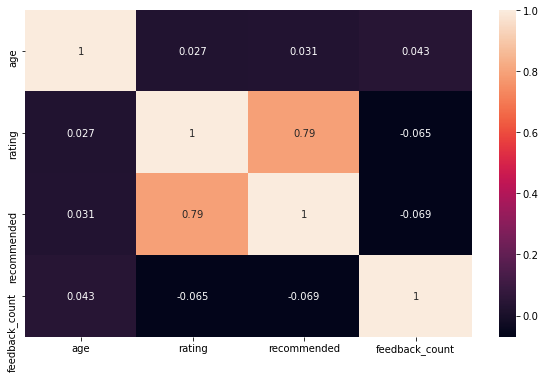

In [139]:
sns.heatmap(df.corr(), annot=True);

- Let us have look at the columns remaining in the dataset.

In [140]:
df.columns

Index(['age', 'title', 'review_text', 'rating', 'recommended',
       'feedback_count', 'division', 'department', 'class'],
      dtype='object')

***age***
- Positive Integer variable of the reviewers age.

In [141]:
first_look("age")

column name    :  age
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  77
39    1269
35     909
36     842
34     804
38     780
37     766
41     741
33     725
46     713
42     651
32     631
48     626
44     617
40     617
43     579
31     569
47     564
53     560
45     529
29     513
49     490
56     471
52     442
28     428
26     423
30     407
50     398
54     395
51     393
57     363
27     344
60     341
62     338
25     331
55     328
59     321
58     277
66     276
64     247
23     247
24     245
63     239
61     227
65     226
67     157
22     146
68     141
69     113
20     108
21     102
70      93
71      51
74      50
72      46
83      43
73      40
19      40
75      26
77      18
78      15
79      15
82      13
76      10
80      10
85       6
84       6
91       5
89       5
81       5
18       4
87       4
94       3
90       2
86       2
93       2
99       2
92       1
Name: age, dtype: int64


In [142]:
df.age.describe().T

count   23486.000
mean       43.199
std        12.280
min        18.000
25%        34.000
50%        41.000
75%        52.000
max        99.000
Name: age, dtype: float64

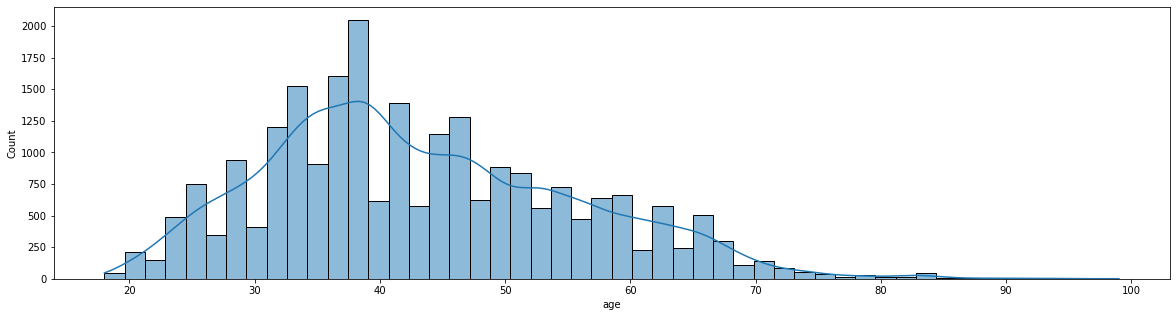

In [143]:
plt.figure(figsize = (20,5))
sns.histplot(df, x='age', kde = True, bins = 50);

***rating*** 
- Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

In [144]:
first_look("rating")

column name    :  rating
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  5
5    13131
4     5077
3     2871
2     1565
1      842
Name: rating, dtype: int64


In [145]:
df.rating.describe().T

count   23486.000
mean        4.196
std         1.110
min         1.000
25%         4.000
50%         5.000
75%         5.000
max         5.000
Name: rating, dtype: float64

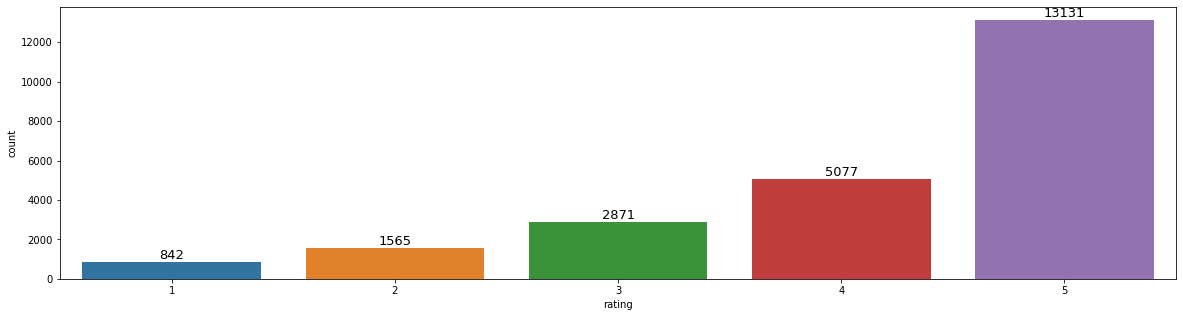

In [146]:
plt.figure(figsize = (20,5))
sns.countplot(x = df.rating, data = df)
for index,value in enumerate(df.rating.value_counts().sort_values()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13);

5    13131
4     5077
3     2871
2     1565
1      842
Name: rating, dtype: int64


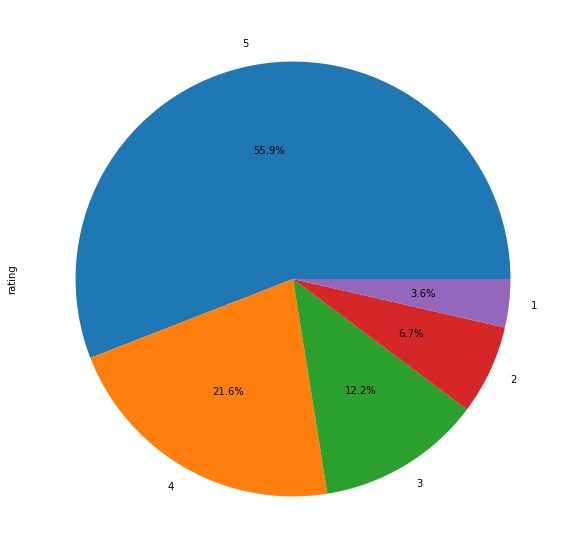

In [147]:
print(df["rating"].value_counts())
df["rating"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

***recommended*** 
- Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

In [148]:
first_look("recommended")

column name    :  recommended
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
1    19314
0     4172
Name: recommended, dtype: int64


In [149]:
df.recommended.describe().T

count   23486.000
mean        0.822
std         0.382
min         0.000
25%         1.000
50%         1.000
75%         1.000
max         1.000
Name: recommended, dtype: float64

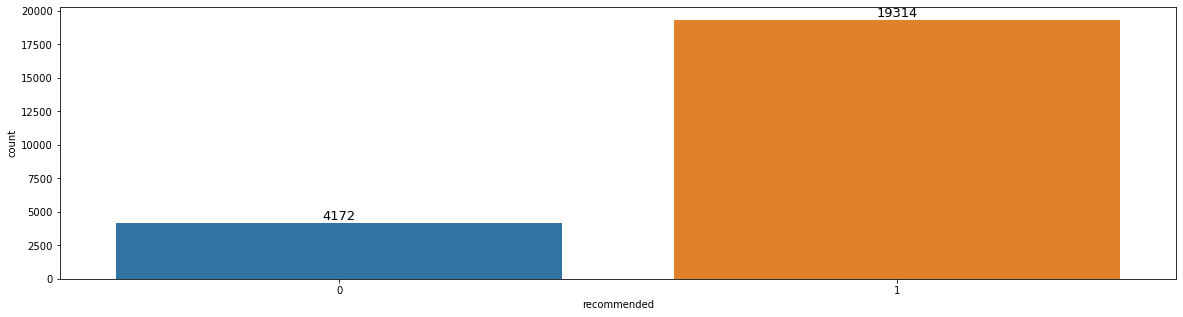

In [150]:
plt.figure(figsize = (20,5))
sns.countplot(x = df.recommended, data = df)
for index,value in enumerate(df.recommended.value_counts().sort_values()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13);

1    19314
0     4172
Name: recommended, dtype: int64


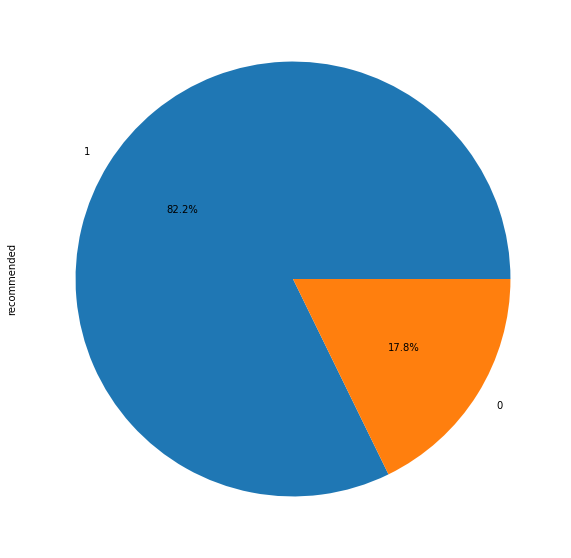

In [151]:
print(df["recommended"].value_counts())
df["recommended"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

***feedback_count:***
- Positive Integer documenting the number of other customers who found this review positive.

In [152]:
first_look("feedback_count")

column name    :  feedback_count
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  82
0      11176
1       4043
2       2193
3       1433
4        922
5        673
6        525
7        374
8        319
9        261
10       225
11       178
12       146
14       121
13       102
15        94
17        81
16        74
18        62
19        54
20        40
23        31
21        30
22        29
25        25
28        24
26        23
24        21
27        20
30        18
31        17
29        15
32        10
42         9
37         9
38         8
34         7
36         6
35         6
33         6
51         5
43         4
45         4
39         4
81         4
65         4
44         3
40         3
47         3
41         3
57         3
46         2
49         2
58         2
53         2
55         2
66         1
78         1
94         1
64         1
48         1
93         1
77         1
61         1
50         1
87         1
98         

In [153]:
df.feedback_count.describe().T

count   23486.000
mean        2.536
std         5.702
min         0.000
25%         0.000
50%         1.000
75%         3.000
max       122.000
Name: feedback_count, dtype: float64

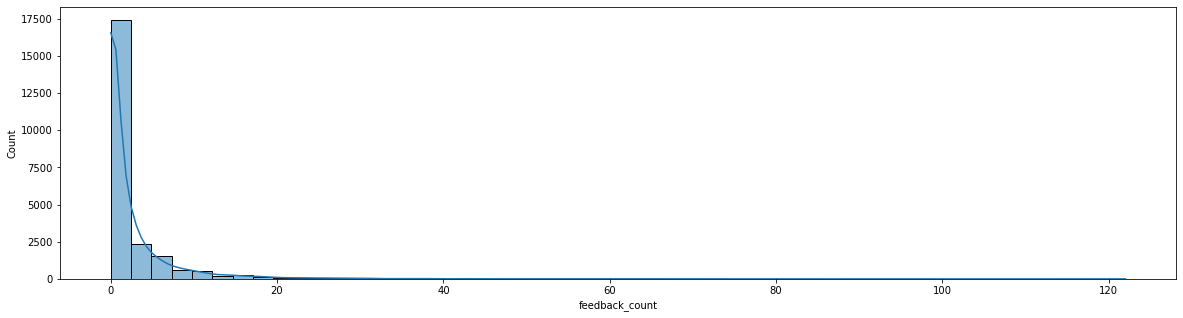

In [154]:
plt.figure(figsize = (20,5))
sns.histplot(df, x='feedback_count', kde = True, bins = 50);

***division*** 
- Categorical name of the product high level division.

In [155]:
first_look("division")

column name    :  division
--------------------------------
per_of_nulls   :  % 0.06
num_of_nulls   :  14
num_of_uniques :  3
General           13850
General Petite     8120
Initmates          1502
NaN                  14
Name: division, dtype: int64


In [156]:
df.division.describe().T

count       23472
unique          3
top       General
freq        13850
Name: division, dtype: object

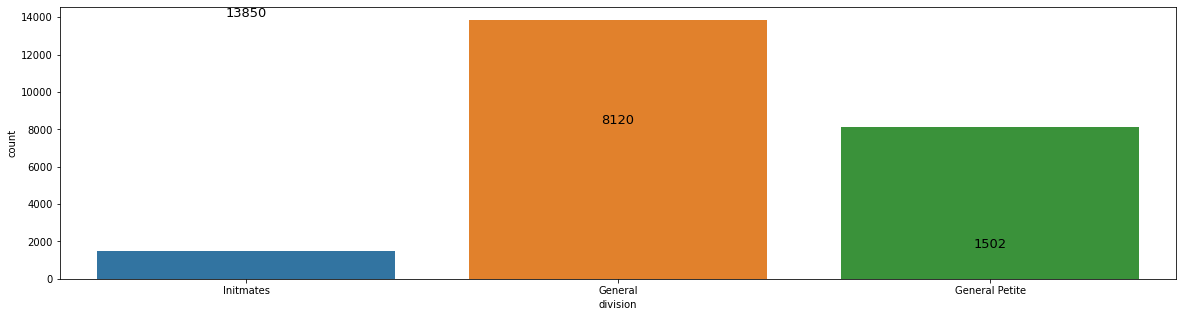

In [157]:
plt.figure(figsize = (20,5))
sns.countplot(x = df.division, data = df)
for index,value in enumerate(df.division.value_counts()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13);

General           13850
General Petite     8120
Initmates          1502
Name: division, dtype: int64


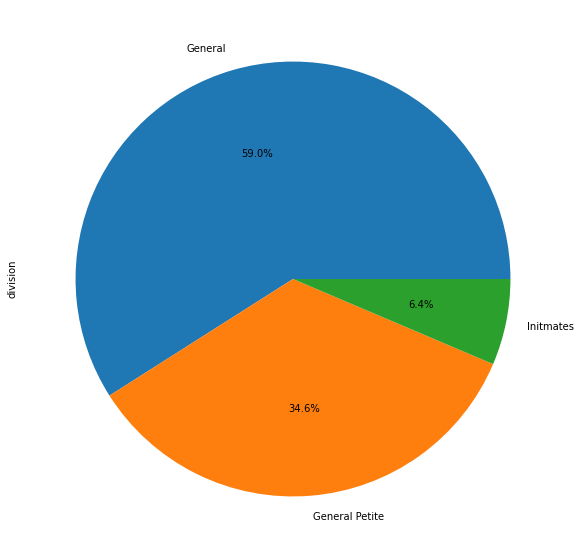

In [158]:
print(df["division"].value_counts())
df["division"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

***department***
- Categorical name of the product department name

In [159]:
first_look("department")

column name    :  department
--------------------------------
per_of_nulls   :  % 0.06
num_of_nulls   :  14
num_of_uniques :  6
Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
NaN            14
Name: department, dtype: int64


In [160]:
df["department"].describe().T

count     23472
unique        6
top        Tops
freq      10468
Name: department, dtype: object

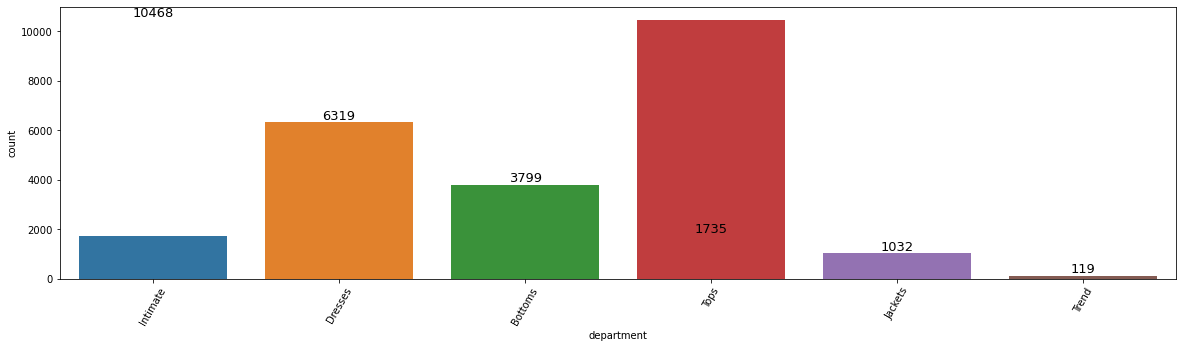

In [161]:
plt.figure(figsize = (20,5))
sns.countplot(x = df["department"], data = df)
plt.xticks(rotation=60)
for index,value in enumerate(df["department"].value_counts()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13);

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: department, dtype: int64


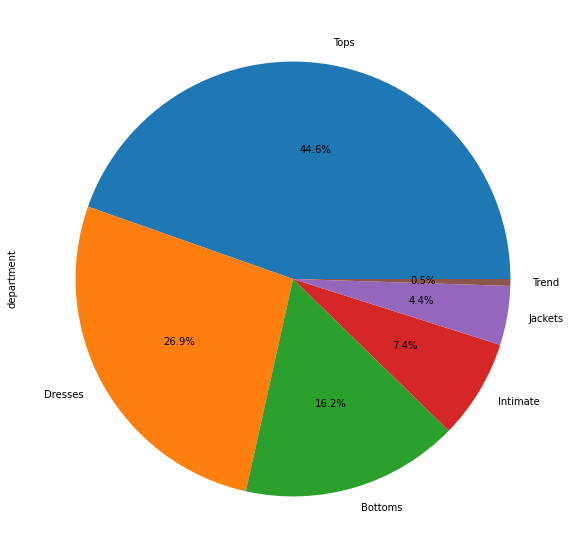

In [162]:
print(df["department"].value_counts())
df["department"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

***class***
- Categorical name of the product class name.

In [163]:
first_look("class")

column name    :  class
--------------------------------
per_of_nulls   :  % 0.06
num_of_nulls   :  14
num_of_uniques :  20
Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
NaN                 14
Casual bottoms       2
Chemises             1
Name: class, dtype: int64


In [164]:
df["class"].describe().T

count       23472
unique         20
top       Dresses
freq         6319
Name: class, dtype: object

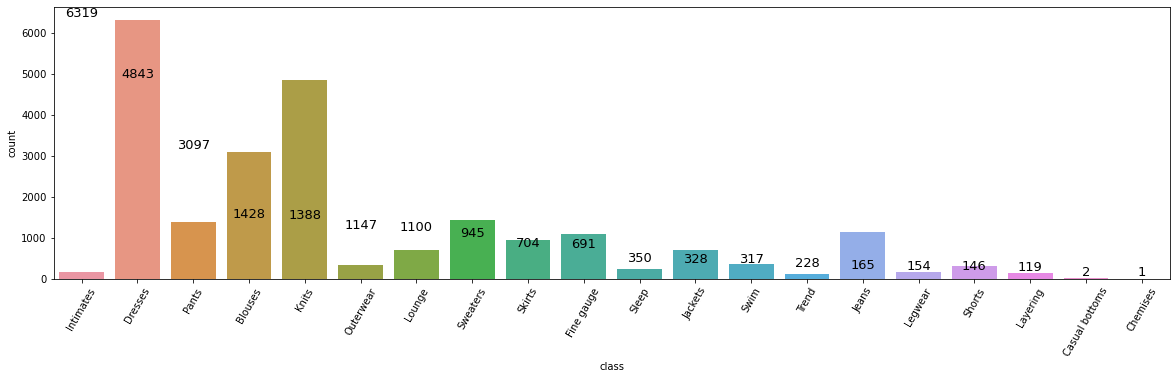

In [165]:
plt.figure(figsize = (20,5))
sns.countplot(x = df["class"], data = df)
plt.xticks(rotation=60)
for index,value in enumerate(df["class"].value_counts()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13);

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: class, dtype: int64


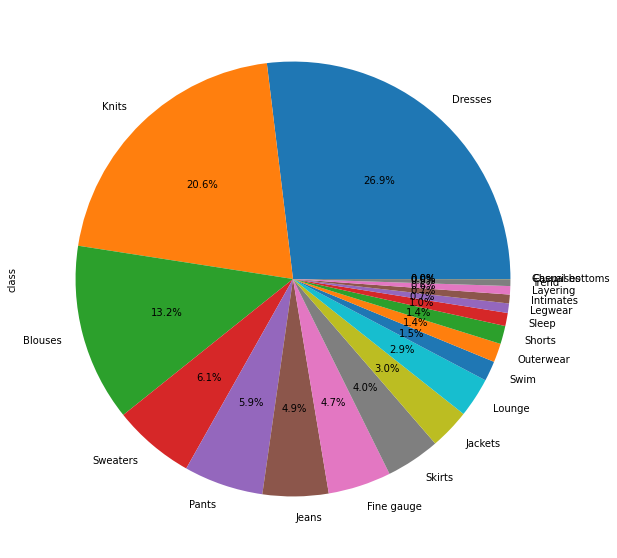

In [166]:
print(df["class"].value_counts())
df["class"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

***title*** 
- String variable for the title of the review.

In [167]:
first_look("title")

column name    :  title
--------------------------------
per_of_nulls   :  % 16.22
num_of_nulls   :  3810
num_of_uniques :  13993
NaN                                                3810
Love it!                                            136
Beautiful                                            95
Love                                                 88
Love!                                                84
                                                   ... 
In agreement with other reviewers...                  1
Funky seams                                           1
Nippley                                               1
Wonderful dress that can be dressed up or down!       1
Nice cardigan, odd colors                             1
Name: title, Length: 13994, dtype: int64


In [168]:
df.title.describe().T

count        19676
unique       13993
top       Love it!
freq           136
Name: title, dtype: object

***review_text*** 
- String variable for the review body.

In [169]:
first_look("review_text")

column name    :  review_text
--------------------------------
per_of_nulls   :  % 3.6
num_of_nulls   :  845
num_of_uniques :  22634
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       845
Perfect fit and i've gotten so many compliments. i buy all my suits from here now!                                                                                                                                                                                                                                                                                   

In [170]:
df.review_text.describe().T

count                                                                                  22641
unique                                                                                 22634
top       Perfect fit and i've gotten so many compliments. i buy all my suits from here now!
freq                                                                                       3
Name: review_text, dtype: object

#### Check Proportion of Target Class Variable:

In [171]:
df.columns

Index(['age', 'title', 'review_text', 'rating', 'recommended',
       'feedback_count', 'division', 'department', 'class'],
      dtype='object')

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

1    19314
0     4172
Name: recommended, dtype: int64


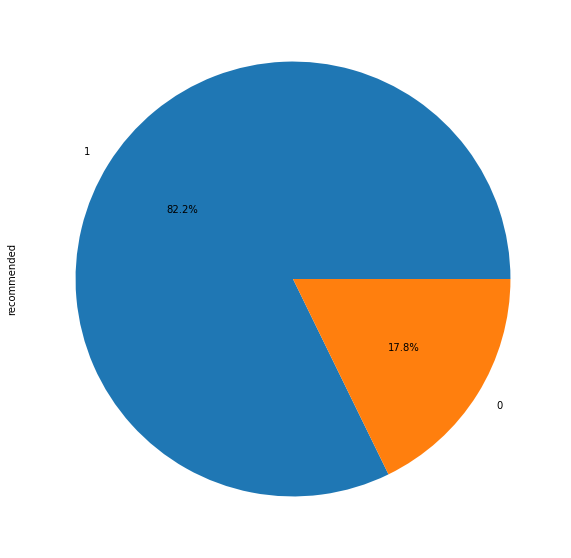

In [172]:
# recommended : 
# Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

print(df["recommended"].value_counts())
df["recommended"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

5    13131
4     5077
3     2871
2     1565
1      842
Name: rating, dtype: int64


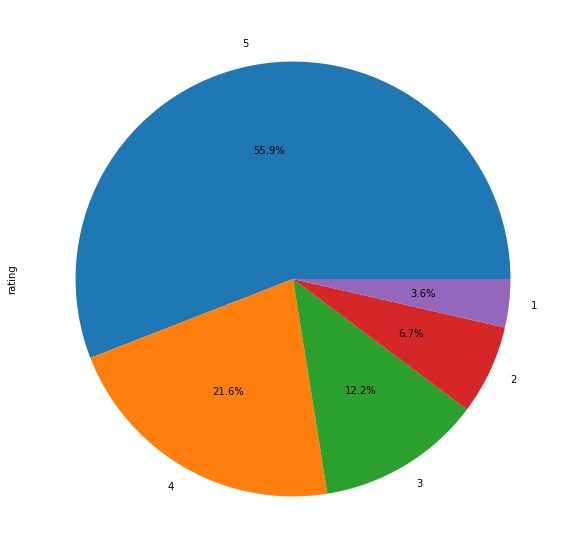

In [173]:
# Rating : 
# Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

print(df["rating"].value_counts())
df["rating"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [174]:
df.columns

Index(['age', 'title', 'review_text', 'rating', 'recommended',
       'feedback_count', 'division', 'department', 'class'],
      dtype='object')

In [175]:
df_1 = df.copy()

# df_1 = df[['review_text', 'recommended']].copy()

In [176]:
drop_columns = ['age', 
                'title', 
                'rating',
                'feedback_count', 
                'division',
                'department',
                'class']

In [177]:
df_1.drop(drop_columns, axis = 1, inplace = True)

In [178]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_text  22641 non-null  object
 1   recommended  23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB


In [179]:
df_1.rename(columns = {'review_text':'text', 'recommended':'recommend'}, inplace = True)

In [180]:
df_1.columns

Index(['text', 'recommend'], dtype='object')

---
---


### Missing Value Detection

In [181]:
missing_values(df_1)

Missing_Number  Missing_Percent
text             845            0.036

In [182]:
df_1.isnull().melt(value_name="missing")

variable  missing
0           text    False
1           text    False
2           text    False
3           text    False
4           text    False
...          ...      ...
46967  recommend    False
46968  recommend    False
46969  recommend    False
46970  recommend    False
46971  recommend    False

[46972 rows x 2 columns]

<Figure size 720x360 with 0 Axes>

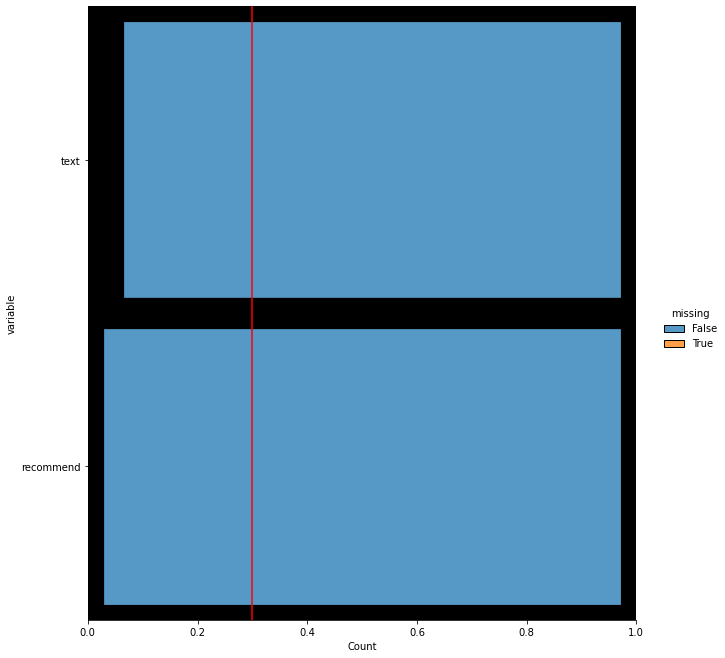

In [183]:
plt.figure(figsize = (10, 5))

sns.displot(
    data = df_1.isnull().melt(value_name = "missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    height = 9.25)

plt.axvline(0.3, color = "r");

In [184]:
df_1 = df_1.dropna()

In [185]:
missing_values(df_1)

Empty DataFrame
Columns: [Missing_Number, Missing_Percent]
Index: []

In [186]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       22641 non-null  object
 1   recommend  22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.6+ KB


---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [187]:
df_1.head()

text  \
0                                                                                                                                                    Absolutely wonderful - silky and sexy and comfortable   
1  Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length...   
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...   
3                                                                             I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4         This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   

   recommend  
0          1  
1          1  
2          0  
3          1  
4          1

In [188]:
stop_words = stopwords.words('english')

In [189]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower()) 
        # ayraçları kaldırıyorum ki (can't gibi) olumsuzluk içeren kelimeler içinde ayraç içerdiği için stopwords lerde silinmesin.
        # Yorumun olumsuz haliyle de olsa kalması için ilave bir yöntem olarak kullanıldı.
        
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]  
        # punctuation ve no lardan kurtuluyoruz.
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]  # stopword lerden temizleme
        # tokenleri teker teker al stopwords ler içinde yoksa olduğu gibi yaz, yani stopwords ise yazma.
        # storwards olmayanları liste içine yazmaya devam et   
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
        # stopwardslardan temizlenmiş tokenleri alıyoruz ve lemma uyguluyoryuz
        
    #joining
    return " ".join(text_cleaned)
        # tamamen temizlenmiş ve köklerine inilmiş kelimeleri alıp join yapıyoruz.

In [190]:
df_1["text"] = df_1["text"].apply(cleaning)
df_1["text"].head()

0                                                                                                                                                                absolutely wonderful silky sexy comfortable
1                       love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2    high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom ha...
3                                                                                                                   love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4                                                                                             shirt flattering due adjustable front tie perfect length wear legging sleeveless pair 

### Rare Words

In [191]:
" ".join(df_1["text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 's

In [192]:
rare_words = pd.Series(" ".join(df_1["text"]).split()).value_counts()
rare_words

# pandas fonksiyonlarını uygulayabilmek için öncelikle Series haline çeviriyoruz.
# hangi token kaç defa geçmiş. birazdan en az geçenleri rare_words e tanımlayacağım. 

dress      11352
fit        10128
size        9363
love        8992
top         8281
           ...  
brownie        1
latest         1
vribant        1
ham            1
scaled         1
Length: 11996, dtype: int64

In [193]:
rare_words = rare_words[rare_words <= 2] 

# 2 dahil diğer hepsini sil
# sayısı 2 ve 2 den az olan kelimeleri bulduk. Corpus ta 1 ya da 2 defa geçiyor
# best practice olarak 2-3 den küçük olanlar rare words olarak belirleniyor

In [194]:
rare_words.index

Index(['invest', 'shortish', 'categorized', 'shining', 'decidedly', 'approved',
       'ny', 'emb', 'fiend', 'explains',
       ...
       'environs', 'mor', 'unprotected', 'integrated', 'kneelength', 'brownie',
       'latest', 'vribant', 'ham', 'scaled'],
      dtype='object', length=6497)

In [195]:
df_1["text"] = df_1["text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df_1["text"].head()

# df2 deki her hangi bir yorumu al
# tokenları al ve split yap
# bu tokenları rarewords da olup olmadığını kontrol et
# değilse liste içerisine al
# ve join ile df2.text içerisinde birleştir.

# her bir yorumu al, split le tokenlerine ayır, her birini nadir geçenlere ait olup olmadığına bak
# değilse liste içine al ve df2["text"] içinde onları topla

# df2 deki her hangi bir yorumu al, teker teker tokenlere ayır ve bu tokenler rare word içinde değil ise bunları liste içine al 
# ve birleştirip text olarak geri döndür.

0                                                                                                                                                                absolutely wonderful silky sexy comfortable
1                       love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2    high hope dress really wanted work initially ordered petite small usual size found small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight laye...
3                                                                                                                   love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4                                                                                             shirt flattering due adjustable front tie perfect length wear legging sleeveless pair 

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [197]:
df_1[df_1["recommend"] == 0].head()

text  \
2   high hope dress really wanted work initially ordered petite small usual size found small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight laye...   
5   love tracy reese dress one petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening skirt would take away embellish...   
10       dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back   
22  first pullover styling side zipper wouldnt purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath look like described sa...   
25            loved material didnt really look long dress purchased large medium im atleast material foot gap front much wider look felt like dress fell flat returned im usually large med fit better jean   

    recommend  
2           0  
5           0  
10          0  
22          0  
25          0

In [198]:
df_1[df_1["recommend"] == 1].head()

text  \
0                                                                                                                                                              absolutely wonderful silky sexy comfortable   
1                     love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite   
3                                                                                                                 love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment   
4                                                                                           shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt   
6  basket hte last see would look like person store pick went teh color pale hte color really gorgeous turn trying little baggy hte x hte size bummer petite decided though said everything pant skirt ...   

   recommend  
0          1  
1          1  
3          1  
4          1  
6          1

### Collect Words (positive and negative separately)

In [200]:
" ".join(df_1["text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flatteri

In [215]:
positive_words =" ".join(df_1[df_1["recommend"] == 1].text).split()
positive_words

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'legging',
 'sleeveless',
 'pair',
 'well',
 'cardigan',
 'love',
 'shirt',
 'basket',
 'hte',
 'last',
 'see',
 'would',
 'look',
 'like',
 'person',
 'store',
 'pick',
 'went',
 'teh',
 'color',
 'pale',
 'hte',
 'color',
 'really',
 'gorgeous',
 'turn',
 'trying',
 'little',
 'baggy',
 'hte',
 'x',
 'hte',
 'size',
 'bummer',
 'petite',
 'decided',
 'though',
 'said',
 'everything',
 '

In [214]:
negative_words = " ".join(df_1[df_1["recommend"] == 0].text).split()
negative_words 

['high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'tracy',
 'reese',
 'dress',
 'one',
 'petite',
 'foot',
 'tall',
 'usually',
 'wear',
 'brand',
 'dress',
 'pretty',
 'package',
 'lot',
 'dress',
 'skirt',
 'long',
 'full',
 'overwhelmed',
 'small',
 'frame',
 'stranger',
 'alteration',
 'shortening',
 'skirt',
 'would',
 'take',
 'away',
 'embellishment',
 'garment',
 'love',
 'color',
 'idea',
 'style',
 'work',
 'returned',
 'dress',
 'dress',
 'run',
 'small',
 'esp',
 'zipper',
 'area',
 'run',
 'ordered',
 'sp',
 'typically',
 'fit',
 'tight',
 'material',

In [206]:
len(positive_words)

516816

In [207]:
len(negative_words)

116488

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [208]:
review_text = df_1["text"]

In [209]:
all_words = " ".join(review_text)

In [210]:
all_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

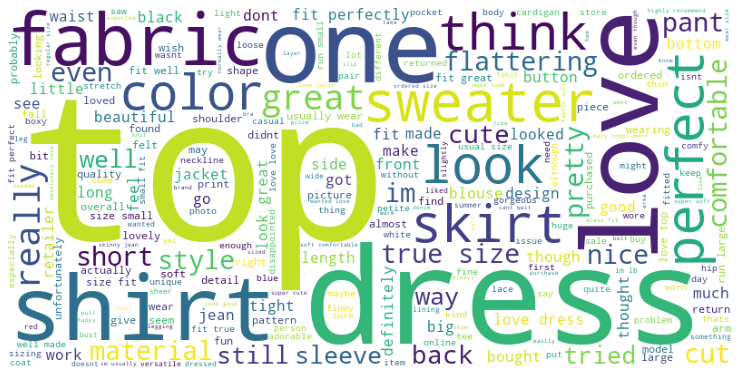

In [220]:
wordcloud = WordCloud(width=800,height=400,background_color="white", max_words =250).generate(all_words)

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

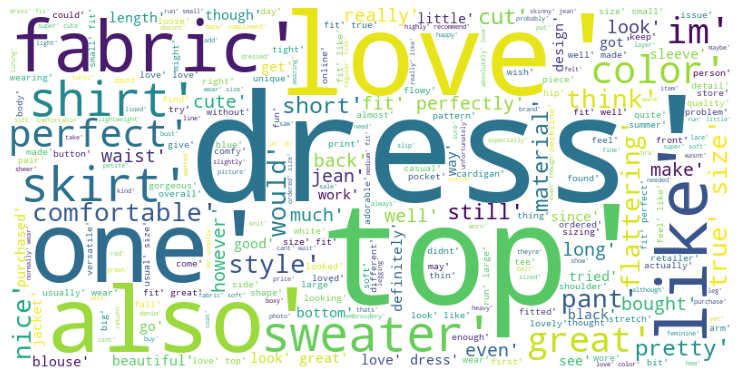

In [221]:
wordcloud = WordCloud(width=800,height=400,background_color="white", max_words =250).generate(str(positive_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

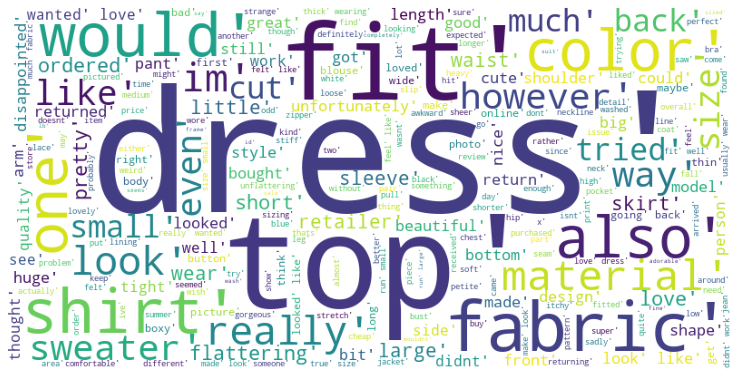

In [222]:
wordcloud = WordCloud(width=800,height=400,background_color="white", max_words =250).generate(str(negative_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Counting words

In [225]:
counter_all = Counter(word_tokenize(all_words))
counter_all.most_common(50)

[('dress', 11352),
 ('fit', 10128),
 ('size', 9363),
 ('love', 8992),
 ('top', 8281),
 ('like', 7036),
 ('color', 6916),
 ('look', 6891),
 ('wear', 6521),
 ('great', 6101),
 ('im', 5968),
 ('would', 5014),
 ('fabric', 4862),
 ('small', 4589),
 ('really', 3924),
 ('ordered', 3835),
 ('little', 3773),
 ('perfect', 3760),
 ('one', 3704),
 ('flattering', 3485),
 ('soft', 3322),
 ('well', 3251),
 ('back', 3186),
 ('comfortable', 3047),
 ('cute', 3030),
 ('nice', 3017),
 ('bought', 2986),
 ('beautiful', 2950),
 ('bit', 2877),
 ('material', 2811),
 ('shirt', 2791),
 ('large', 2791),
 ('much', 2703),
 ('sweater', 2700),
 ('length', 2638),
 ('run', 2631),
 ('jean', 2600),
 ('also', 2583),
 ('work', 2527),
 ('petite', 2430),
 ('got', 2426),
 ('long', 2400),
 ('short', 2361),
 ('waist', 2306),
 ('quality', 2259),
 ('medium', 2233),
 ('skirt', 2220),
 ('think', 2194),
 ('pretty', 2188),
 ('even', 2166)]

## 5. Sentiment Classification with Machine Learning and Deep Learning

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [228]:
X = df_1["text"]
y = df_1["recommend"]

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

# veri dengesiz-imbalanced olduğu için stratify kullanıldı.

<IPython.core.display.Javascript object>

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [231]:
from sklearn.feature_extraction.text import CountVectorizer

In [232]:
vectorizer = CountVectorizer()   # benim corpusum (datasetim) içerisindeki geçen bütün unique tokenlerimi önce tespit eden ve 
                                 # ardından sayan bir işlemdir.
X_train_count = vectorizer.fit_transform(X_train)  # fit ile X_trainde geçen unique tüm tokenleri tespit ediyor ve transform ile onları sayıyor
X_test_count = vectorizer.transform(X_test)  # X_train de eğitildiği için X_train de geçme durumuna göre X_test'te sayma işlemini yapar.
                                            # X_testte geçen bir token, eğitildiği X_train de yok ise onu yok sayar, işlem yapmaz
    
# demek ki X_train yeterince büyük olmalı ki X_test içinde geçen her türlü olasılığa cevap versin, tüm tokenler için sayma işlemini yapsın, kelime atlamasın. 

# scale işleminde yaptığımız gibi, leakage önlemek için train --> fit_transform, test --> transform
# fit_transform dediğimiz için unique olan tüm kelimeleri sayıyor ve array e dönüştürüyor
# test te geçen bir kelime train de geçmiyorsa model o kelimeyi yok sayar, görmez.
# model ne kadar fazla kelime içeriyorsa o kadar bu handikapın önüne geçiyor.

# FIT train setindeki kelimeleri tespit ediyor, transform sayıyor ve array a dönüştürüyor
# FIT train setine göre yapıldığı için, TEST te TRAİNe göre transform olacak.

In [233]:
X_train_count

<18112x5469 sparse matrix of type '<class 'numpy.int64'>'
	with 459520 stored elements in Compressed Sparse Row format>

In [234]:
X_test_count

<4529x5469 sparse matrix of type '<class 'numpy.int64'>'
	with 113972 stored elements in Compressed Sparse Row format>

In [235]:
len(X_train_count.toarray())

18112

In [236]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [237]:
len(X_test_count.toarray())

4529

In [238]:
X_test_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [239]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())

# vectorizer.get_feature_names() --> train setinde eğittiğim bütün unique isimleri getiriyor
# df e çevirdiğimiz zaman aşağıdaki gibi tüm unique isimleri feature olarak tek tek veriyor.
# bu satırların herbiri bir yorum

# x_train içindeki tüm unique tokenleri feature olarak verdi
# onehotencoder ın feature larea uygulanmış hali olarak düşünülebilir
# satırlarda da o satırda kaç tane geçtiği rakamsal olarak var
# bu durum/yapı modeli biraz hantallaştırıyor. çok büyük datalarda hata verebilir
# PCA : Principal Component Analysis, PCA uygulayarak boyutu küçültebiliriz. 
# PCA yapınca feature ların yorumlanması ile ilgili bazı insight kaybı oluyor. Ancak burada bu önemli değil.
# yukarda sayısallaştırmayı tamamladım

# benim X_train içerisindeki eğittiğim bütün tokenlerin isimlerini bana getiriyor.

aa  ab  abby  abdomen  ability  able  abo  absolute  absolutely  \
0       0   0     0        0        0     0    0         0           0   
1       0   0     0        0        0     0    0         0           0   
2       0   0     0        0        0     0    0         0           0   
3       0   0     0        0        0     0    0         0           0   
4       0   0     0        0        0     0    0         0           0   
...    ..  ..   ...      ...      ...   ...  ...       ...         ...   
18107   0   0     0        0        0     0    0         0           0   
18108   0   0     0        0        0     0    0         0           0   
18109   0   0     0        0        0     0    0         0           0   
18110   0   0     0        0        0     0    0         0           0   
18111   0   0     0        0        0     0    0         0           0   

       absolutley  abstract  absurd  abt  abundance  ac  accent  accented  \
0               0         0       0    0          0   0       0         0   
1               0         0       0    0          0   0       0         0   
2               0         0       0    0          0   0       0         0   
3               0         0       0    0          0   0       0         0   
4               0         0       0    0          0   0       0         0   
...           ...       ...     ...  ...        ...  ..     ...       ...   
18107           0         0       0    0          0   0       0         0   
18108           0         0       0    0          0   0       0         0   
18109           0         0       0    0          0   0       0         0   
18110           0         0       0    0          0   0       0         0   
18111           0         0       0    0          0   0       0         0   

       accentuate  accentuated  accentuates  accentuating  accept  acceptable  \
0               0            0            0             0       0           0   
1               0            0            0             0       0           0   
2               0            0            0             0       0           0   
3               0            0            0             0       0           0   
4               0            0            0             0       0           0   
...           ...          ...          ...           ...     ...         ...   
18107           0            0            0             0       0           0   
18108           0            0            0             0       0           0   
18109           0            0            0             0       0           0   
18110           0            0            0             0       0           0   
18111           0            0            0             0       0           0   

       access  accessorize  accessorized  accessorizing  accessory  accident  \
0           0            0             0              0          0         0   
1           0            0             0              0          0         0   
2           0            0             0              0          0         0   
3           0            0             0              0          0         0   
4           0            0             0              0          0         0   
...       ...          ...           ...            ...        ...       ...   
18107       0            0             0              0          0         0   
18108       0            0             0              0          0         0   
18109       0            0             0              0          0         0   
18110       0            0             0              0          0         0   
18111       0            0             0              0          0         0   

       accidental  accidentally  accommodate  accommodates  accommodating  \
0               0             0            0             0              0   
1               0             0            0             0              0   
2               0           

In [240]:
X_train

1222                                                                                                    beautiful sweater soft lovely color easy wear current photo true length pound ordered regular sm fit hip
15835    surprised low review dress dress obviously loose fitting style bit man quality fabric beautiful pattern stunning find loose flowy style comfortable love boot tights winter also planning wear sanda...
6000                                      bought blue love usually wear x small retailer shirt small medium dress ended extra small petite really flattering hide stomach enough highly recommend dress size way
13404            dress run bit small large arm hole unflattering small chest also dress seemed make belly protrude kind made look pregnant way dress could see dress flattering someone flat stomach large chest
9098                                                                                hourglass shape dress good fit think dress look better person picture however im

### TF-IDF

In [241]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [242]:
# eğitim mantığı diğerleriyle tamamen aynı

tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train) # FIT train setindeki unique tokenleri tespit ediyor ve hangi satırlarda geçtiğini buluyor
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)       # TRANSFORM bu tokenlerin sayısını alıyor ve bu tokenlerle TF-IDF yapıyor

# tf_idf: fit deyince X_traindeki tüm unique tokenleri tespit ediyor ve bütün satırlarda (dokümanlarda) o tokenin geçme sıklığını da sayıyor.
# count vectorizer da sadece unique tokenleri tespit ediyordu burda dokümanlardaki tekrar sayısı da işin içinde..

# transform deyince bunları sayıyor ve fonksiyonu uygulayıp tf-idf katsayılarını buluyor.

In [243]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [244]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

aa    ab  abby  abdomen  ability  able   abo  absolute  absolutely  \
0     0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
1     0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
2     0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
3     0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
4     0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
...     ...   ...   ...      ...      ...   ...   ...       ...         ...   
18107 0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
18108 0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
18109 0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
18110 0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
18111 0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   

       absolutley  abstract  absurd   abt  abundance    ac  accent  accented  \
0           0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
1           0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
2           0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
3           0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
4           0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
...           ...       ...     ...   ...        ...   ...     ...       ...   
18107       0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
18108       0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
18109       0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
18110       0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
18111       0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   

       accentuate  accentuated  accentuates  accentuating  accept  acceptable  \
0           0.000        0.000        0.000         0.000   0.000       0.000   
1           0.000        0.000        0.000         0.000   0.000       0.000   
2           0.000        0.000        0.000         0.000   0.000       0.000   
3           0.000        0.000        0.000         0.000   0.000       0.000   
4           0.000        0.000        0.000         0.000   0.000       0.000   
...           ...          ...          ...           ...     ...         ...   
18107       0.000        0.000        0.000         0.000   0.000       0.000   
18108       0.000        0.000        0.000         0.000   0.000       0.000   
18109       0.000        0.000        0.000         0.000   0.000       0.000   
18110       0.000        0.000        0.000         0.000   0.000       0.000   
18111       0.000        0.000        0.000         0.000   0.000       0.000   

       access  accessorize  accessorized  accessorizing  accessory  accident  \
0       0.000        0.000         0.000          0.000      0.000     0.000   
1       0.000        0.000         0.000          0.000      0.000     0.000   
2       0.000        0.000         0.000          0.000      0.000     0.000   
3       0.000        0.000         0.000          0.000      0.000     0.000   
4       0.000        0.000         0.000          0.000      0.000     0.000   
...       ...          ...           ...            ...        ...       ...   
18107   0.000        0.000         0.000          0.000      0.000     0.000   
18108   0.000        0.000         0.000          0.000      0.000     0.000   
18109   0.000        0.000         0.000          0.000      0.000     0.000   
18110   0.000        0.000         0.000          0.000      0.000     0.000   
18111   0.000        0.000         0.000          0.000      0.000     0.000   

       accidental  accidentally  accommodate  accommodates  accommodating  \
0           0.000         0.000        0.000         0.000          0.000   
1          

## Logistic Regression

### CountVectorizer

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced')
log.fit(X_train_count,y_train)

In [ ]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

In [ ]:
viz = PrecisionRecallCurve(
    LogisticRegression(C = 0.02, max_iter=1000),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
y_pred = log.predict(X_test_count)
log_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
log_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
log_AP_neg = viz.score_["negative"]

In [ ]:
log = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced')
log.fit(X_train_count,y_train)

In [ ]:
print("LOG MODEL BALANCED")
eval(log, X_train_count, X_test_count)

### TF-IDF

## Naive Bayes 

### Countvectorizer

### TF-IDF

## Support Vector Machine (SVM)

### Countvectorizer

### TD-IDF

## Random Forest

### Countvectorizer

### TF-IDF

## Ada Boosting

### Countvectorizer

### TF-IDF

## DL modeling

### Tokenization

### Creating word index

### Converting tokens to numeric

### Maximum number of tokens for all documents¶

### Fixing token counts of all documents (pad_sequences)

### Train Set Split

### Modeling

### Model evaluation

### Compare Models F1 Scores, Recall Scores and Average Precision Score

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___